In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
%cd sample_data

/content/sample_data


In [5]:
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df= pd.get_dummies(data=df,drop_first=True)

In [8]:
df.head(10)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,False,False,False,False,False,False,False,False,False,False
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,False,False,False,False,False,False,False,False,True,False
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,False,False,False,False,False,False,False,False,False,False
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,False,False,False,False,False,False,False,False,False,False
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,False,False,False,False,False,False,False,False,True,False
5,6,15574012,645,44,8,113755.78,2,1,0,149756.71,...,False,False,False,False,False,False,False,False,True,True
6,7,15592531,822,50,7,0.00,2,1,1,10062.80,...,False,False,False,False,False,False,False,False,False,True
7,8,15656148,376,29,4,115046.74,4,1,0,119346.88,...,False,False,False,False,False,False,False,True,False,False
8,9,15792365,501,44,4,142051.07,2,0,1,74940.50,...,False,False,False,False,False,False,False,False,False,True
9,10,15592389,684,27,2,134603.88,1,1,1,71725.73,...,False,False,False,False,False,False,False,False,False,True


<Axes: ylabel='Frequency'>

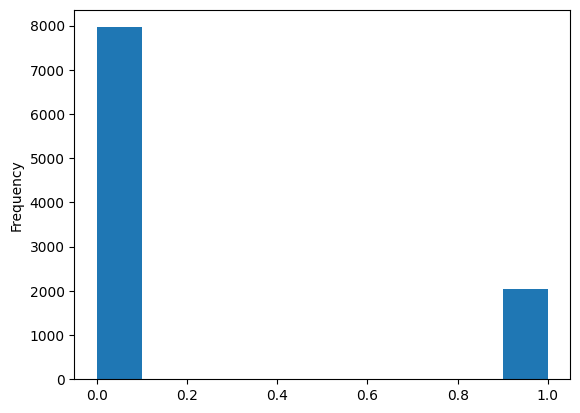

In [9]:
df.Exited.plot.hist()

In [10]:
df_2=df.drop(columns='Exited')


In [10]:
corr=df.corr()

In [11]:
X= df.drop(columns='Exited')
y= df['Exited']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


X_test.shape

(2000, 2944)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


X_train

array([[ 0.83147035, -0.20216686,  0.16958176, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [ 1.48342312,  0.80704397, -2.30455945, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.68744824, -1.51908128, -1.19119591, ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [-0.59446028, -1.63233785,  0.9015152 , ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [ 1.6804608 , -0.38173152, -0.62420521, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.77836212, -1.37508365, -0.28401079, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)


y_pred= clf.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)


results=pd.DataFrame([['Logistic regression',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.7705,0.27027,0.379464,0.209877


In [14]:
print(confusion_matrix(y_test,y_pred))

[[1456  139]
 [ 320   85]]


In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred= clf.predict(X_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
RF_results=pd.DataFrame([['Random Forest Classifier',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])

# Use the `concat` method to combine the DataFrames
results = pd.concat([results, RF_results], ignore_index=True)

In [17]:
RF_results

,Model,Accuracy,F1,Precision,Recall
0,Random Forest Classifier,0.861,0.523973,0.854749,0.377778
